In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic_train = pd.read_csv("data/train.csv")
titanic_test = pd.read_csv("data/test.csv")
display(titanic_train.head())
display(titanic_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##  Features Description

- Ticket, passengerId and Name are not relevant

In [3]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
display(titanic_train[columns + ['Survived']].describe())
display(titanic_train[columns + ['Survived']].describe(include = ['O']))

display(titanic_test[columns].describe())
display(titanic_test[columns].describe(include = ['O']))

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,B96 B98,S
freq,577,4,644


,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


,Sex,Cabin,Embarked
count,418,91,418
unique,2,76,3
top,male,B57 B59 B63 B66,S
freq,266,3,270


- Pclass, ParCh, SibSp are categorical ordinal
- Sex, Cabin, Embarked are categorical nominal
- Age and Fare are continous

### Missing values

- Age has missing values in both train and test -> impute
- Fare has a missing value in test -> impute 
- Embarked two missing values in train -> drop the two entries
- Cabin missing values means no cabin -> transform in cabin yes/no

In [4]:
sexMap = {'male': 0, 'female': 1}
cabinMap = {'no':0, 'yes':1}

In [5]:
def dummify(df, features = []):
    if len(features) == 0:
        return df.get_dummy()
    dummies = pd.get_dummies(df[features])
    return pd.concat([df.drop(features, axis = 1), dummies], axis = 1)

In [6]:
def train(df = titanic_train, split = False):
    columns =  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'] + ['Survived']
    
    proc = (df[columns].
        #pipe(display).
        assign(
            Pclass = df.Pclass.astype('category'),
            Sex = df.Sex.apply(lambda x: sexMap[x]).astype('category'),
            Cabin = df.Cabin.fillna('no').apply(lambda x: 1 if x != 'no' else 0 ),
            Survived = df.Survived.astype('category')
        ).
        #pipe(display).
        dropna(subset=['Embarked']).
            pipe(dummify, ['Pclass', 'Embarked'])
    )
    if split:
        return (proc.loc[:, proc.columns != 'Survived'], proc['Survived']) 
    return proc
        
train()

,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,1,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,0,0,1,0,0,0,1
887,1,19.0,0,0,30.0000,1,1,1,0,0,0,0,1
888,1,NaN,1,2,23.4500,0,0,0,0,1,0,0,1
889,0,26.0,0,0,30.0000,1,1,1,0,0,1,0,0


In [7]:
def test(df = titanic_test):
    columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
    return (
        df[columns].
        assign(
            Pclass = df.Pclass.astype('category'),
            Sex = df.Sex.apply(lambda x: sexMap[x]).astype('category'),
            Cabin = df.Cabin.fillna('no').apply(lambda x: 1 if x != 'no' else 0 ),
            
        ).
            pipe(dummify, ['Pclass', 'Embarked'])
    )

test()
    

,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,34.5,0,0,7.8292,0,0,0,1,0,1,0
1,1,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,0,0,1,0,0,1,0
3,0,27.0,0,0,8.6625,0,0,0,1,0,0,1
4,1,22.0,1,1,12.2875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,NaN,0,0,8.0500,0,0,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,1,0,0,1,0,0
415,0,38.5,0,0,7.2500,0,0,0,1,0,0,1
416,0,NaN,0,0,8.0500,0,0,0,1,0,0,1


In [8]:
#!pip install blockdiag


In [9]:
#!mkdir diagrams
#%%file diagrams/pipeline


In [10]:
#blockdiag {
#  // Define class (list of attributes)
#  class emphasis [color = lightblue, style = dashed];
#  class redline [color = red, style = dotted];

#  Impute -> Preprocess -> Model -> Tuning;

  #// Set class to node
  #Transform [class = "emphasis"];

  #// Set class to edge
  #Transform -> Load [class = "redline"];
#}
#!blockdiag diagrams/pipeline

# Build sklearn Pipeline

![](diagrams/pipeline.png)

In [11]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer


In [12]:
# imputer that keeps the column names
class DFimputer(TransformerMixin):
    def __init__(self, imputer):
        self.ii = imputer
        
    def fit(self, X, y = None):
        self.ii.fit(X)
        return self
        
    def transform(self, X):
        return pd.DataFrame(self.ii.transform(X), columns = X.columns)


In [13]:
iimp = IterativeImputer( estimator= RandomForestRegressor(
        # We tuned the hyperparameters of the RandomForestRegressor to get a good
        # enough predictive performance for a restricted execution time.
        n_estimators=4,
        max_depth=10,
        bootstrap=True,
        max_samples=0.5,
        n_jobs=-1,
        random_state=0))
         
simp = SimpleImputer(strategy='mean')

sc =  ColumnTransformer(
         transformers=[("num", StandardScaler(), ["Age", "Fare"])],
            remainder='passthrough'
        )


preprocessor = Pipeline(
    [
        ('Imputer', DFimputer(
            imputer = iimp,
        )),
        ('Scaler', sc)
    ]
)

param_preprocessor = {
    'Imputer': [iimp, simp],
    'Scaler': [sc, 'passthrough']
}

In [14]:
# Tree model
tree = make_pipeline(preprocessor, DecisionTreeClassifier())
#display(tree.get_params().keys())
param_grid_tree = {'decisiontreeclassifier__max_depth': [i for i in range(1,10)]}


In [15]:
# Logistic Regression
elasticnetlogreg = make_pipeline(preprocessor, LogisticRegression(penalty='elasticnet', solver='saga'))
#display(logreg.get_params().keys())
param_grid_elasticnetlogreg = {'logisticregression__l1_ratio': np.linspace(0, 1, 10)}

logreg = make_pipeline(preprocessor, LogisticRegression())
#display(logreg.get_params().keys())
param_grid_logreg = {}

In [16]:
# Ensemble
randomforest = make_pipeline(preprocessor, RandomForestClassifier())
display(randomforest.get_params().keys())
param_grid_randomforest = {
    #'randomforestclassifier__max_features':[i for i in range(4,10)]
    'randomforestclassifier__max_depth':[i for i in range(4,10)]
}

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__Imputer', 'pipeline__Scaler', 'pipeline__Scaler__n_jobs', 'pipeline__Scaler__remainder', 'pipeline__Scaler__sparse_threshold', 'pipeline__Scaler__transformer_weights', 'pipeline__Scaler__transformers', 'pipeline__Scaler__verbose', 'pipeline__Scaler__num', 'pipeline__Scaler__num__copy', 'pipeline__Scaler__num__with_mean', 'pipeline__Scaler__num__with_std', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split',

In [17]:
X, y = train(split=True)
results = {}
models = {}
for name, model, param in zip(['decision Tree', 'logistic regression', 'elasticnet', 'random forest'],
                              [tree, logreg, elasticnetlogreg, randomforest],
                              [param_grid_tree, param_grid_logreg, param_grid_elasticnetlogreg, param_grid_randomforest]):
    print(f"Training {name} ...")
    param_complete = param #| {'pipeline__'+k:v for k,v in param_preprocessor.items()}
    tuner = GridSearchCV(model, param_grid=param_complete,
                         cv = 5, n_jobs=-1, return_train_score=True)
    tuner.fit(X,y)
    results[name] = pd.DataFrame(tuner.cv_results_)
    models[name] = tuner


Training decision Tree ...
Training logistic regression ...
Training elasticnet ...


C:\Users\ITTRNMAGS\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Training random forest ...


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.586466,0.010252,0.026206,0.002213,1,{'decisiontreeclassifier__max_depth': 1},0.803371,0.803371,0.786517,0.752809,...,0.786276,0.018469,8,0.781997,0.781997,0.786217,0.794655,0.786517,0.786277,0.004624
1,0.544008,0.047764,0.023325,0.001053,2,{'decisiontreeclassifier__max_depth': 2},0.747191,0.792135,0.786517,0.752809,...,0.772792,0.018836,9,0.796062,0.784810,0.786217,0.805907,0.786517,0.791903,0.008063
2,0.492145,0.014669,0.025603,0.003565,3,{'decisiontreeclassifier__max_depth': 3},0.814607,0.803371,0.808989,0.780899,...,0.804285,0.012348,6,0.825598,0.819972,0.827004,0.839662,0.814607,0.825369,0.008390
3,0.514304,0.011785,0.025726,0.003424,4,{'decisiontreeclassifier__max_depth': 4},0.797753,0.820225,0.814607,0.792135,...,0.817825,0.025491,1,0.836850,0.845288,0.838256,0.845288,0.842697,0.841676,0.003525
4,0.528183,0.015393,0.024707,0.001270,5,{'decisiontreeclassifier__max_depth': 5},0.797753,0.803371,0.820225,0.769663,...,0.809954,0.029335,4,0.855134,0.859353,0.842475,0.859353,0.862360,0.855735,0.007018
5,0.544518,0.018031,0.029167,0.007874,6,{'decisiontreeclassifier__max_depth': 6},0.786517,0.803371,0.803371,0.775281,...,0.803199,0.024563,7,0.866385,0.881857,0.856540,0.874824,0.883427,0.872607,0.010044
6,0.543404,0.014914,0.028035,0.007676,7,{'decisiontreeclassifier__max_depth': 7},0.775281,0.797753,0.859551,0.769663,...,0.807681,0.034915,5,0.881857,0.907173,0.873418,0.898734,0.901685,0.892573,0.012774
7,0.553160,0.007611,0.026364,0.001986,8,{'decisiontreeclassifier__max_depth': 8},0.825843,0.769663,0.870787,0.786517,...,0.813274,0.034882,3,0.901547,0.928270,0.894515,0.905767,0.918539,0.909728,0.012129
8,0.446508,0.014804,0.017060,0.004207,9,{'decisiontreeclassifier__max_depth': 9},0.814607,0.792135,0.853933,0.792135,...,0.815534,0.023053,2,0.925457,0.947961,0.905767,0.933896,0.932584,0.929133,0.013774


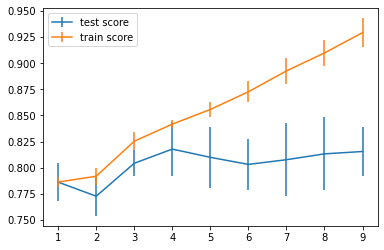

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.467908,0.011088,0.021215,0.002529,{},0.814607,0.808989,0.786517,0.786517,0.824859,0.804298,0.015384,1,0.810127,0.825598,0.810127,0.814346,0.814607,0.814961,0.005664


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.597564,0.010410,0.025854,0.002452,0.0,{'logisticregression__l1_ratio': 0.0},0.808989,0.808989,0.786517,0.786517,...,0.803174,0.014784,1,0.810127,0.825598,0.810127,0.814346,0.814607,0.814961,0.005664
1,0.602836,0.020802,0.024760,0.004086,0.111111,{'logisticregression__l1_ratio': 0.11111111111...,0.808989,0.808989,0.786517,0.786517,...,0.803174,0.014784,1,0.810127,0.825598,0.810127,0.814346,0.814607,0.814961,0.005664
2,0.588921,0.009475,0.019996,0.000921,0.222222,{'logisticregression__l1_ratio': 0.22222222222...,0.814607,0.808989,0.780899,0.786517,...,0.803174,0.016783,1,0.810127,0.824191,0.810127,0.814346,0.813202,0.814399,0.005174
3,0.544796,0.019933,0.020382,0.003947,0.333333,{'logisticregression__l1_ratio': 0.33333333333...,0.814607,0.808989,0.780899,0.786517,...,0.803174,0.016783,1,0.808720,0.824191,0.810127,0.814346,0.814607,0.814398,0.005412
4,0.526708,0.014876,0.022190,0.003305,0.444444,{'logisticregression__l1_ratio': 0.44444444444...,0.814607,0.808989,0.780899,0.786517,...,0.803174,0.016783,1,0.807314,0.822785,0.810127,0.812940,0.814607,0.813554,0.005242
5,0.529507,0.010127,0.020185,0.002497,0.555556,{'logisticregression__l1_ratio': 0.55555555555...,0.814607,0.808989,0.780899,0.786517,...,0.802044,0.015420,6,0.807314,0.822785,0.810127,0.812940,0.814607,0.813554,0.005242
6,0.532318,0.005115,0.025001,0.003270,0.666667,{'logisticregression__l1_ratio': 0.66666666666...,0.814607,0.808989,0.780899,0.786517,...,0.802044,0.015420,6,0.807314,0.821378,0.810127,0.812940,0.814607,0.813273,0.004754
7,0.536844,0.011562,0.023174,0.001103,0.777778,{'logisticregression__l1_ratio': 0.77777777777...,0.808989,0.808989,0.780899,0.786517,...,0.799791,0.013356,8,0.807314,0.822785,0.810127,0.812940,0.814607,0.813554,0.005242
8,0.512645,0.015826,0.018873,0.000816,0.888889,{'logisticregression__l1_ratio': 0.88888888888...,0.808989,0.808989,0.780899,0.786517,...,0.799791,0.013356,8,0.808720,0.822785,0.810127,0.812940,0.814607,0.813836,0.004928
9,0.438589,0.104583,0.019415,0.001766,1.0,{'logisticregression__l1_ratio': 1.0},0.808989,0.808989,0.780899,0.786517,...,0.799791,0.013356,8,0.808720,0.822785,0.810127,0.811533,0.816011,0.813835,0.005100


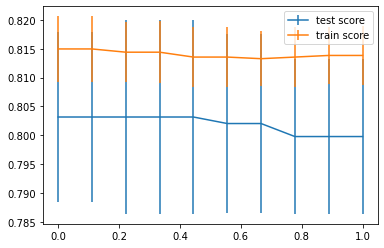

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.721982,0.011378,0.038310,0.003445,4,{'randomforestclassifier__max_depth': 4},0.747191,0.803371,0.865169,0.797753,...,0.813318,0.042393,6,0.836850,0.846695,0.832630,0.852321,0.831461,0.839991,0.008170
1,0.749344,0.038894,0.041243,0.006328,5,{'randomforestclassifier__max_depth': 5},0.803371,0.808989,0.859551,0.792135,...,0.822301,0.026329,2,0.855134,0.863572,0.848101,0.860759,0.835674,0.852648,0.010001
2,0.801993,0.014424,0.040235,0.001806,6,{'randomforestclassifier__max_depth': 6},0.786517,0.803371,0.853933,0.792135,...,0.818942,0.031055,4,0.877637,0.891702,0.884669,0.867792,0.875000,0.879360,0.008201
3,0.843051,0.153365,0.039998,0.006568,7,{'randomforestclassifier__max_depth': 7},0.792135,0.786517,0.865169,0.808989,...,0.817793,0.029311,5,0.908579,0.922644,0.897328,0.898734,0.897472,0.904951,0.009787
4,0.767381,0.047532,0.039250,0.004364,8,{'randomforestclassifier__max_depth': 8},0.775281,0.797753,0.876404,0.825843,...,0.824548,0.035667,1,0.921238,0.931083,0.911392,0.919831,0.917135,0.920136,0.006428
5,0.670094,0.013085,0.036923,0.003667,9,{'randomforestclassifier__max_depth': 9},0.780899,0.792135,0.865169,0.814607,...,0.820053,0.032027,3,0.933896,0.946554,0.935302,0.942335,0.935393,0.938696,0.004908


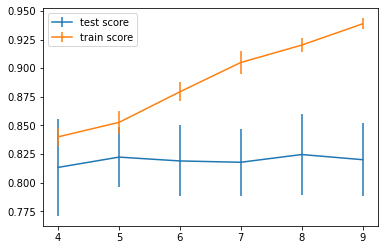

In [18]:
import seaborn as sns
import matplotlib.pylab as plt

for n in results:
    cv_res = results[n]
    display(cv_res)
    if cv_res.shape[0] == 1:
        continue
    plt.figure()
    plt.errorbar(x = cv_res.filter(regex=("^param_(.)*")).iloc[:,0], y = cv_res['mean_test_score'], yerr=cv_res['std_test_score'],
                label = 'test score')
    plt.errorbar(x = cv_res.filter(regex=("^param_(.)*")).iloc[:,0], y = cv_res['mean_train_score'], yerr=cv_res['std_train_score'],
                label = 'train score')
    plt.legend()
    plt.show()

In [19]:
final_result = {'model':[], 'accuracy':[]}
for name in results:
    final_result['model'].append(name)
    final_result['accuracy'].append(models[name].best_score_)
display(pd.DataFrame(final_result))


,model,accuracy
0,decision Tree,0.817825
1,logistic regression,0.804298
2,elasticnet,0.803174
3,random forest,0.824548


## Result model

The tree model seems working better in this situation, It considers more interactions.
In terms of performances the random forest is the best.
Otherwise we could explore the decision tree just to understand the factor related to survival.

In [20]:
# best model is the random forest with max depth = 5, since it is less overfitted to data
best_model = RandomForestClassifier(max_depth=5).fit(preprocessor.fit_transform(X,y),y)


In [21]:
predictions = best_model.predict(preprocessor.fit_transform(test()))

In [22]:
submission = pd.DataFrame({'PassengerId':titanic_test['PassengerId'], 'Survived':predictions})
submission.set_index('PassengerId')
display(submission)
submission.to_csv("submission.csv", index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


### Visualize Tree structure

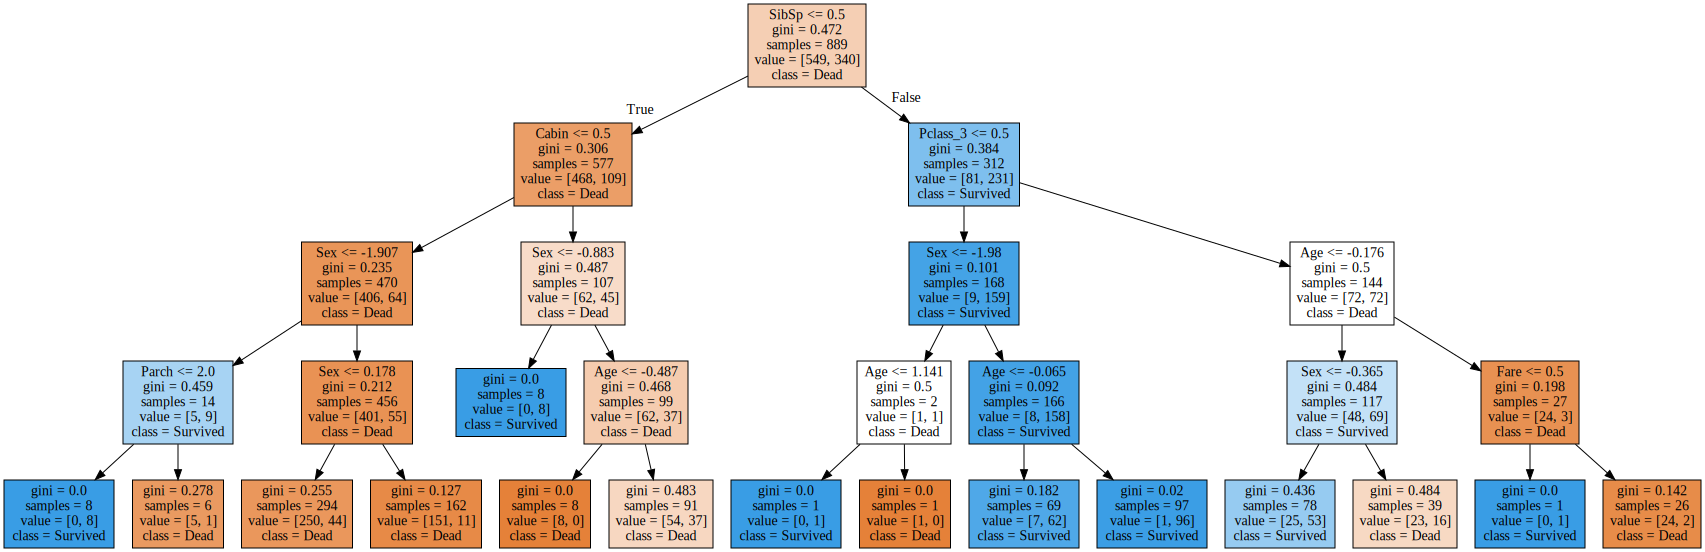

In [27]:
import graphviz
from sklearn import tree
best_tree_model = DecisionTreeClassifier(max_depth = 4).fit(preprocessor.fit_transform(X,y), y)
features = X.columns
dot_data = tree.export_graphviz(best_tree_model, out_file=None, 
                                feature_names=features,  
                                class_names=['Dead', 'Survived'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [28]:
#!pip install pygraphviz
#import pybaobabdt
#from scipy.io import arff
#best_tree_model = DecisionTreeClassifier(max_depth = 4).fit(preprocessor.fit_transform(X,y))
#features = X.columns
#ax = pybaobabdt.drawTree(best_tree_model, size=10, dpi=72, features=features)